In [4]:
# Import required libraries
import pandas as pd

In [5]:
# Load the data
df = pd.read_csv("owid-covid-data.csv")

In [6]:
# Preview the first few rows
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [7]:
# Check column names
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
# Check for missing values
print(df.isnull().sum())

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [9]:
# Data Cleaning
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Filter for selected countries
countries = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries)]

In [11]:
# Drop rows with missing dates or total_cases
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])

In [12]:
# Fill missing values in important columns
df_filtered[['total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = df_filtered[[
    'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations'
]].fillna(0)

In [13]:
print(df_filtered.head())

       iso_code continent location       date  total_cases  new_cases  \
173549      IND      Asia    India 2020-01-05          0.0        0.0   
173550      IND      Asia    India 2020-01-06          0.0        0.0   
173551      IND      Asia    India 2020-01-07          0.0        0.0   
173552      IND      Asia    India 2020-01-08          0.0        0.0   
173553      IND      Asia    India 2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN           0.0         0.0                  NaN   
173550                 NaN           0.0         0.0                  NaN   
173551                 NaN           0.0         0.0                  NaN   
173552                 NaN           0.0         0.0                  NaN   
173553                 NaN           0.0         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
173549  ...      

In [14]:
# Exploratory Data Analysis
# Plot Total Cases Over Time:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Set plot style
sns.set(style='darkgrid')

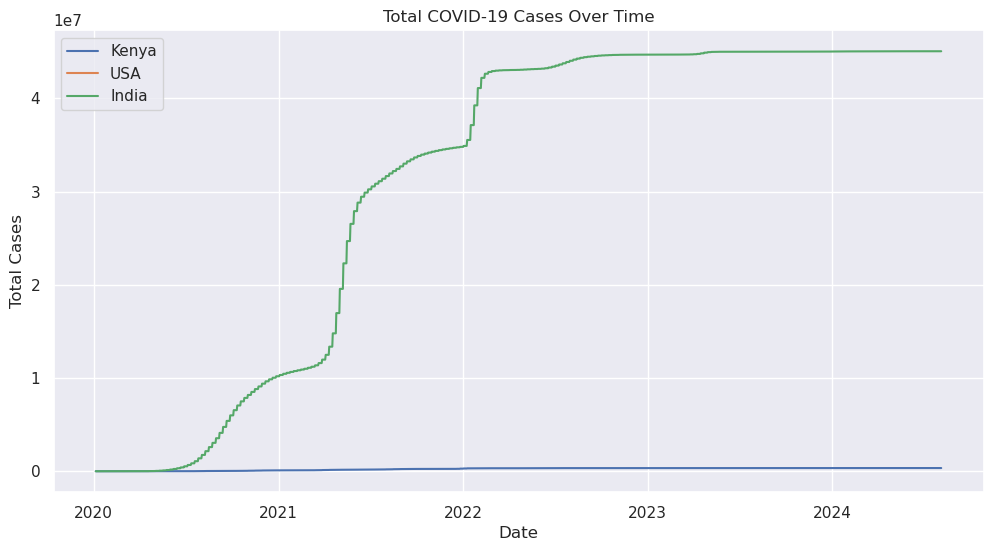

In [27]:
# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

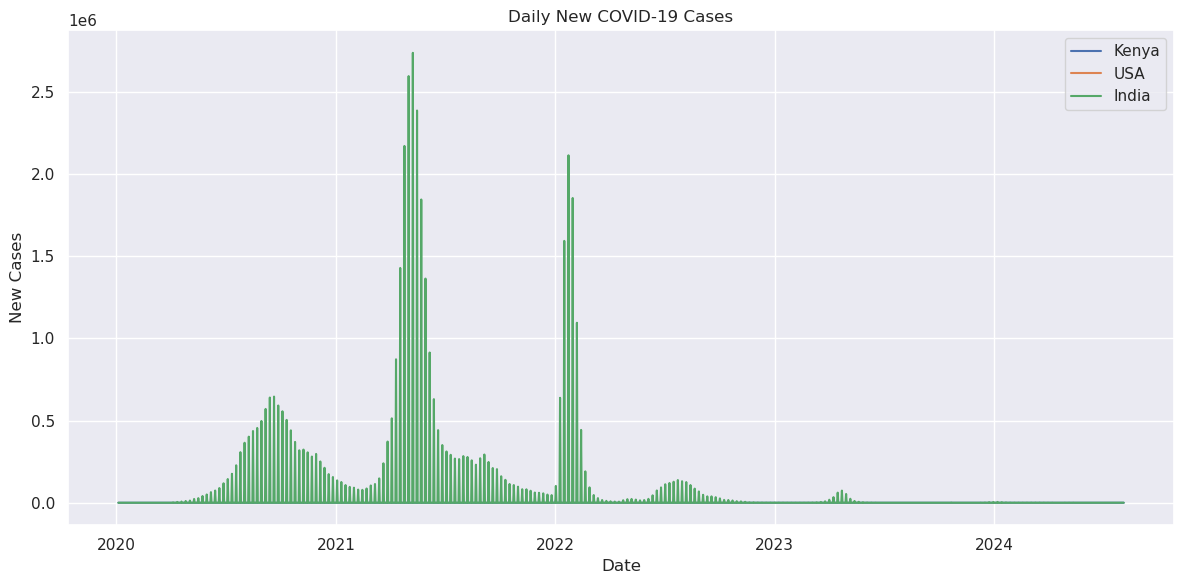

In [25]:
#Plot Daily New Cases Comparison
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

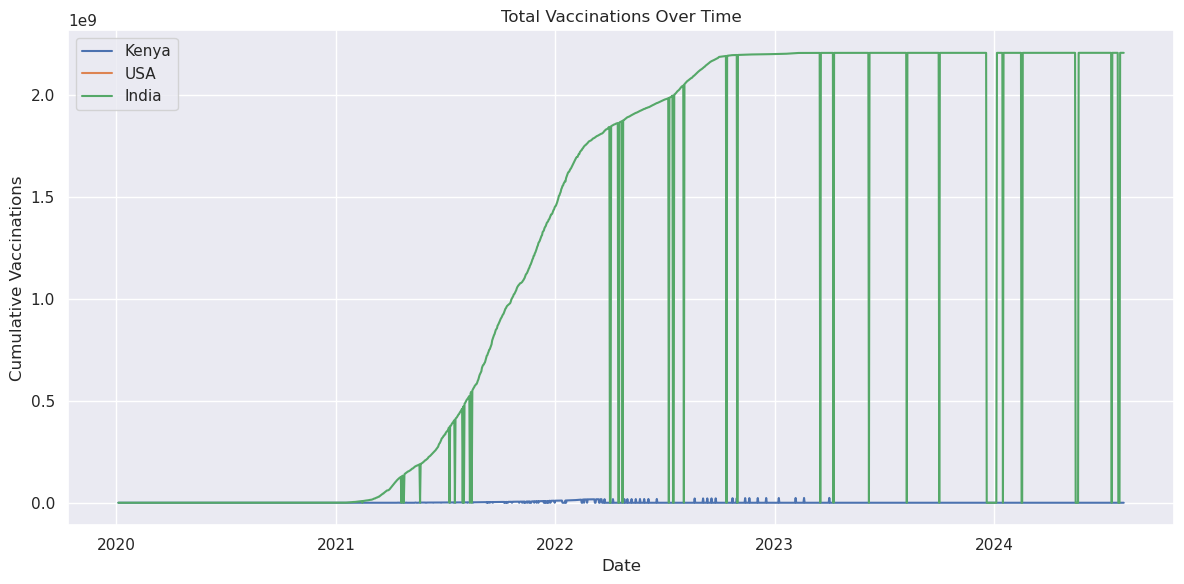

In [26]:
# Vaccination Analysis
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### Key Insights:

# 1. India experienced the highest total number of COVID-19 cases among the three countries.
# 2. The USA had an early surge in cases and deaths compared to Kenya and India.
# 3. Kenya maintained relatively lower numbers but had delayed vaccination rollout.
# 4. All countries saw a spike in new cases around mid-2021.
# 5. The vaccination rate in the USA increased sharply in early 2021.